In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pyart
import cartopy

%matplotlib inline

# Introduction

One thing that can be very useful when using radar data is gridding - or mapping the radar polar cordinates to a cartesian grid. 

This can make it easier to compare the radar with other instruments. It is also helpful when you want to incorporate radar data into models, or compare with model output.

PyART has a gridding algorithm, which is what I will use to show you this. We will walk through the example shown at: https://arm-doe.github.io/pyart/notebooks/mapping_data_to_a_cartesian_grid.html 

# Gridding

Let's start by reading in the data.

In [4]:
radar = pyart.io.read('houcsapr2cfrqcS2.b1/houcsapr2cfrqcS2.b1.20220701.192603.nc')

In [15]:
radar.metadata['scan_name']

'ppi'

Next, lets create the grid object from the radar object, and plot it.

Grid shape is the amount of points within a dimension. 

Grid limits is the dimension limits in meters.

In [16]:
grid = pyart.map.grid_from_radars(radar, grid_shape=(41, 201, 201), 
                                  grid_limits=((0.,20000,), (-100000., 100000.), (-100000, 100000.)))

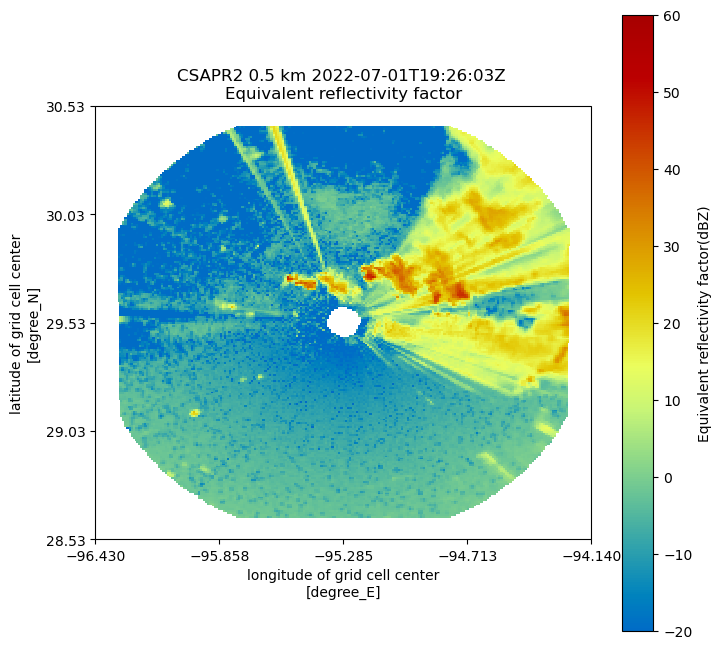

In [17]:
fig = plt.figure(figsize=[8, 8])
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid('reflectivity', level=1, vmin=-20, vmax=60)

## Exercise

1. In the above plot, change the level around. What do you see happening? Why is this happening?

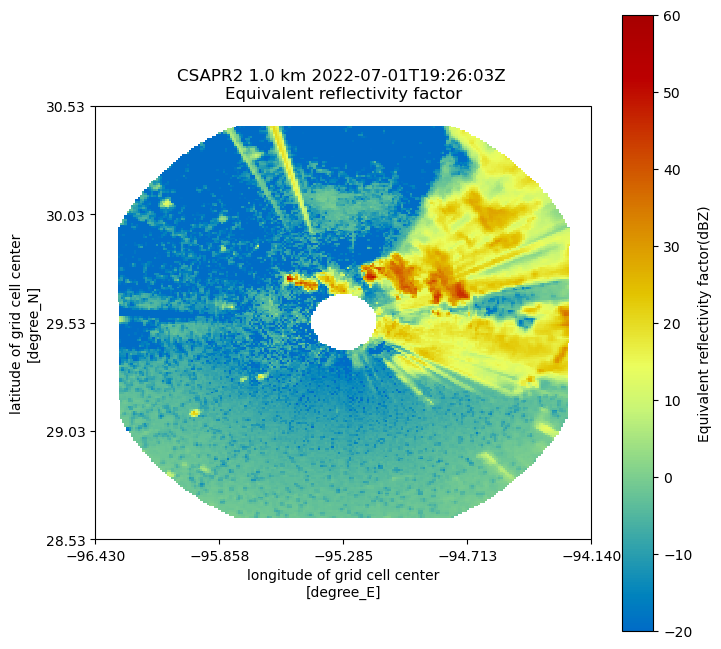

In [21]:
fig = plt.figure(figsize=[8, 8])
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid('reflectivity', level=2, vmin=-20, vmax=60)

## Pseudo-RHIs



From this gridded data, we can make pseudo-RHIs through the gridded PPI data at any latitude or longitude we want. 

Below is a latitude slice, but we can change 'latitude' to 'longitude' to grab a longitudinal slice instead.

(-100.0, 100.0)

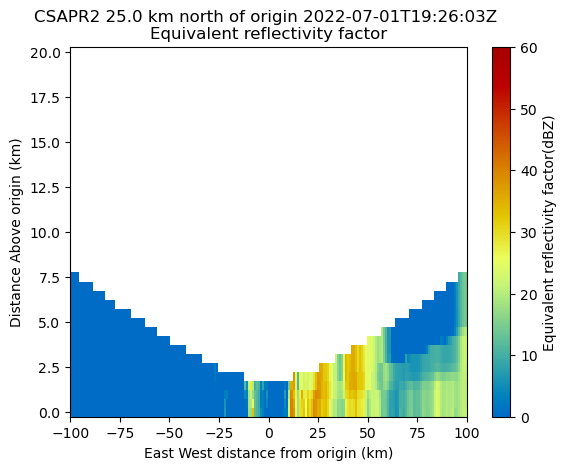

In [22]:
display.plot_latitude_slice('reflectivity', lat=29.76, vmin=0, vmax=60)
plt.xlim([-100, 100])

(-100.0, 100.0)

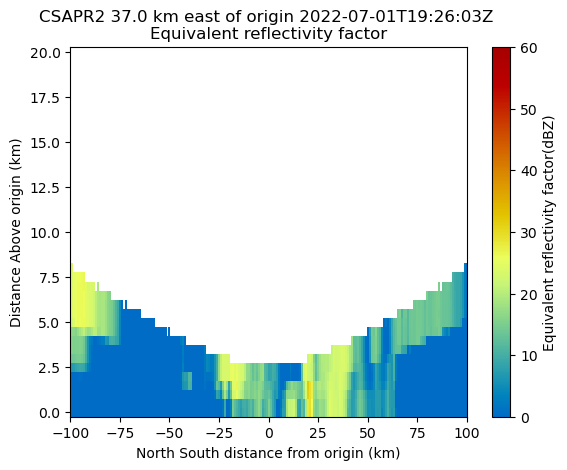

In [24]:
display.plot_longitude_slice('reflectivity', lon=-94.9, vmin=0, vmax=60)
plt.xlim([-100, 100])

## A better grid?

You can also change the weighting funtion and radius used when gridding to try to get a better grid. 

There is often an issue with radars that have higher elevation scans that when you go higher there start to be more gaps in the data, which is made more noticeable in the gridded data. Our radar's PPIs for this campaign are focused at lower levels so we don't have many issues showing up in the gridded data.

In [25]:
grid_better = pyart.map.grid_from_radars(
    radar, grid_shape=(41, 201, 201), 
    grid_limits=((0.,20000,), (-100000., 100000.), (-100000, 100000.)),
    roi_func='dist_beam', min_radius=1750.0, weighting_function='cressman')

(-100.0, 100.0)

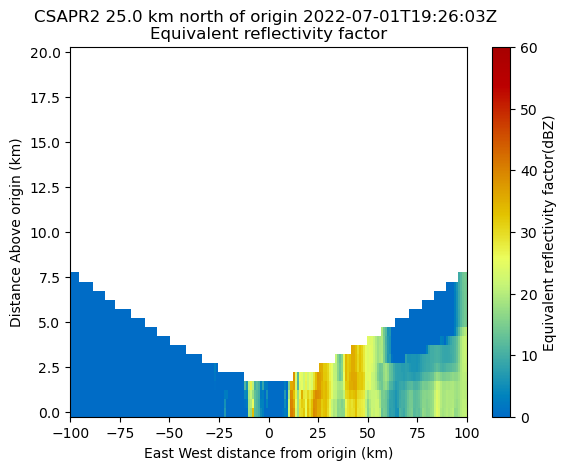

In [26]:
display = pyart.graph.GridMapDisplay(grid_better)
display.plot_latitude_slice('reflectivity', lat=29.76, vmin=0, vmax=60)
plt.xlim([-100, 100])

## Exercise
1. Grab one of the SACR PPI files and grid it. 
2. Take that gridded data and plot a latitude or longitude slice.

### Solution

In [27]:
sacr = pyart.io.read('houxsacrcfrqcM1.b1/houxsacrcfrqcM1.b1.20220701.192929.nc')

In [28]:
sacr.scan_type

'ppi'

In [29]:
sacr.sweep_number['data']

masked_array(data=[0],
             mask=False,
       fill_value=999999,
            dtype=int32)

In [30]:
grid = pyart.map.grid_from_radars(sacr, grid_shape=(41, 201, 201), 
                                  grid_limits=((0.,20000,), (-25000., 25000.), (-25000, 25000.)))

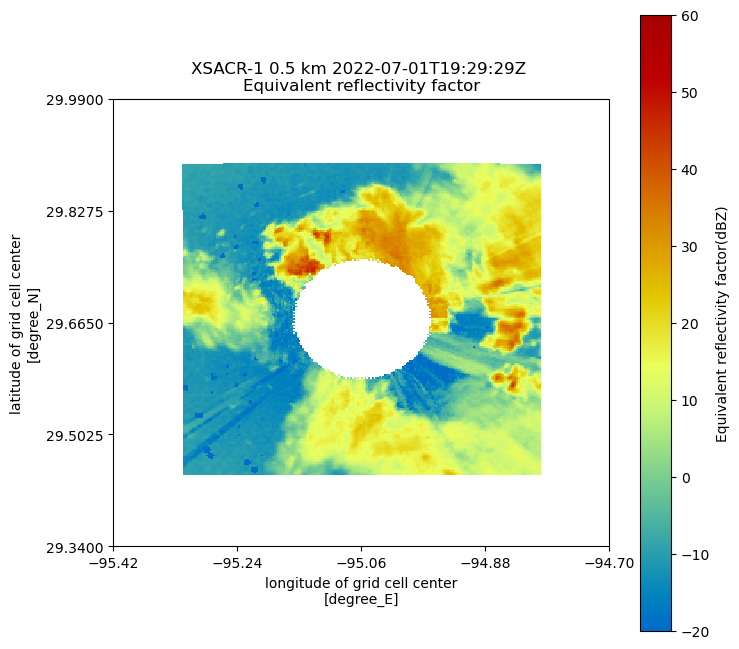

In [31]:
fig = plt.figure(figsize=[8, 8])
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid('reflectivity', level=1, vmin=-20, vmax=60)

(-25.0, 25.0)

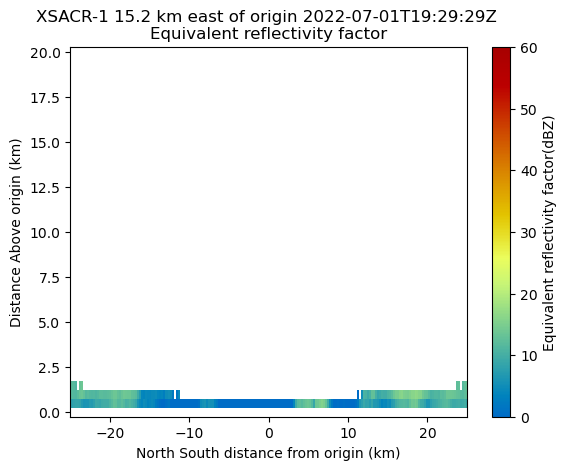

In [33]:
display.plot_longitude_slice('reflectivity', lon=-94.9, vmin=0, vmax=60)
plt.xlim([-25, 25])